In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

import math

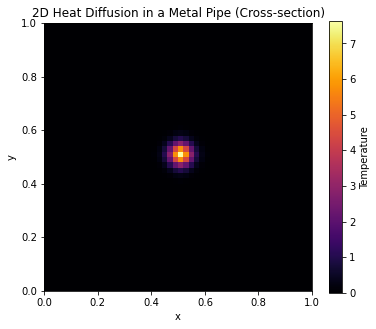

In [2]:
# Simulation parameters
Lx, Ly = 1.0, 1.0  # Length of the pipe in x and y directions
Nx, Ny = 50, 50    # Number of grid points
dx, dy = Lx / (Nx - 1), Ly / (Ny - 1)  # Grid spacing
alpha = 0.01       # Thermal diffusivity of the material
dt = 0.0001        # Time step
time_steps = 500   # Number of time steps

# Stability condition for the explicit method
if dt > (dx**2 * dy**2) / (2 * alpha * (dx**2 + dy**2)):
    raise ValueError("Time step is too large for stability.")

# Initialize temperature grid
T = np.zeros((Nx, Ny))
T_new = np.copy(T)

# Initial conditions: heat source in the center
T[Nx//2, Ny//2] = 100.0

# Boundary conditions (constant temperature boundaries)
def apply_boundary_conditions(T):
    T[0, :] = 0.0    # Left boundary
    T[-1, :] = 0.0   # Right boundary
    T[:, 0] = 0.0    # Bottom boundary
    T[:, -1] = 0.0   # Top boundary

# Main simulation loop
for step in range(time_steps):
    for i in range(1, Nx - 1):
        for j in range(1, Ny - 1):
            T_new[i, j] = T[i, j] + alpha * dt * (
                (T[i+1, j] - 2 * T[i, j] + T[i-1, j]) / dx**2 +
                (T[i, j+1] - 2 * T[i, j] + T[i, j-1]) / dy**2
            )
    # Update temperature grid and apply boundary conditions
    T = np.copy(T_new)
    apply_boundary_conditions(T)

# Plot the final temperature distribution
plt.figure(figsize=(6, 5))
plt.imshow(T, extent=[0, Lx, 0, Ly], origin='lower', cmap=cm.inferno)
plt.colorbar(label="Temperature")
plt.xlabel("x")
plt.ylabel("y")
plt.title("2D Heat Diffusion in a Metal Pipe (Cross-section)")
plt.show()

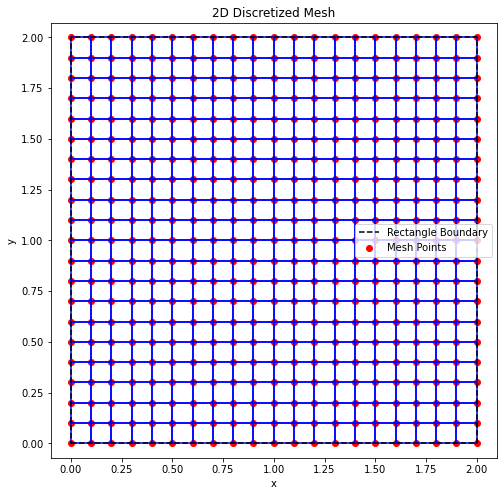

In [27]:
def MakeDiscreteCells(l, w, maxEdgeLength=0.1):
    """
    l, w [float]: dimensions of 2D rectangular body
    
    maxEdgeLength [float]: max length of edge of any cell
    
    returns: array of tuples (2D points) and rectangular cells, indexed into points array.
    """
    assert(l>0)
    assert(w>0)
    
    points2d = []
    cells = []
    
    numRows = math.ceil(l / maxEdgeLength)
    numCols = math.ceil(w / maxEdgeLength)
    lDist = l / numRows
    wDist = w / numCols
    
    rowp2ds = [0]
    colp2ds = [0]
    n = 1
    k = 1
    
    for _ in range(numRows-1):
        rowp2ds.append(n*lDist)
        n += 1
    for _ in range(numCols-1):
        colp2ds.append(k*wDist)
        k += 1
    
    rowp2ds.append(l)
    colp2ds.append(w)
    
    # Generate 2D Points
    for rp in rowp2ds:
        for cp in colp2ds:
            points2d.append((cp, rp))
    
    # Generate Indexed Cells
    for i in range(len(points2d)-(len(colp2ds)+1)):
        if (i>0) and ((i+1)%len(colp2ds)==0):
            continue
    
        cell = [i, i+1, i+len(colp2ds)+1, i+len(colp2ds)]
        cells.append(cell)
    
    return points2d, cells

def VizMesh2D(points2d, cells):
    """
    Given 2D Point and Quad/Rectangle cell information, visualizes the discretized 2D body.
    """
    xCoords, yCoords = zip(*points2d)
    
    # Dynamic aspect ratio
    maxW = max(xCoords) - min(xCoords)
    maxL = max(yCoords) - min(yCoords)
    aspectRatio = maxW / maxL
    base = 8
    width = base * aspectRatio if aspectRatio >= 1 else base
    length = base / aspectRatio if aspectRatio < 1 else base
    
    # Create the plot
    plt.figure(figsize=(width, length))
    plt.scatter(xCoords, yCoords, color='red', label='Mesh Points')  # Scatter plot of points
    
    # Draw the cells
    for cell in cells:
        # Get the corner points of the cell
        cellPoints = [points2d[cell[i]] for i in range(4)] + [points2d[cell[0]]]  # Close the rectangle
        cellX, cellY = zip(*cellPoints)
        plt.plot(cellX, cellY, color='blue')  # Plot cell edges
    
    # Draw the boundary of the rectangle
    rectX = [0, max(xCoords), max(xCoords), 0, 0]
    rectY = [0, 0, max(yCoords), max(yCoords), 0]
    plt.plot(rectX, rectY, color='black', linestyle='--', label='Rectangle Boundary')
    
    # Labels
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('2D Discretized Mesh')
    plt.legend()
    plt.axis('equal')
    plt.show()

# Example
points, cells = MakeDiscreteCells(2, 2, 0.1)
VizMesh2D(points, cells)
